In [ ]:
import cv2 as cv
import numpy as np
import re
from matplotlib.gridspec import GridSpec
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Add a shortcut of the Resume_Data folder to My Drive
file_path = "/content/drive/MyDrive/CISC3440_Project/Resume_Data/"

In [ ]:
import pandas as pd
path = "/content/drive/MyDrive/CISC3440_Project/Resume_CSV/Resume.csv"
df = pd.read_csv(path)

#Data Exploring

In [ ]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2484 entries, 0 to 2483
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   ID           2484 non-null   int64 
 1   Resume_str   2484 non-null   object
 2   Resume_html  2484 non-null   object
 3   Category     2484 non-null   object
dtypes: int64(1), object(3)
memory usage: 77.8+ KB


In [ ]:
#Display the categories of the dataset
data_labels = df['Category'].unique()
data_labels

array(['HR', 'DESIGNER', 'INFORMATION-TECHNOLOGY', 'TEACHER', 'ADVOCATE',
       'BUSINESS-DEVELOPMENT', 'HEALTHCARE', 'FITNESS', 'AGRICULTURE',
       'BPO', 'SALES', 'CONSULTANT', 'DIGITAL-MEDIA', 'AUTOMOBILE',
       'CHEF', 'FINANCE', 'APPAREL', 'ENGINEERING', 'ACCOUNTANT',
       'CONSTRUCTION', 'PUBLIC-RELATIONS', 'BANKING', 'ARTS', 'AVIATION'],
      dtype=object)

In [ ]:
#Display the  unique values of the dataset
item_counts_nml = df['Category'].value_counts(normalize = True)
print(item_counts_nml)

INFORMATION-TECHNOLOGY    0.048309
BUSINESS-DEVELOPMENT      0.048309
FINANCE                   0.047504
ADVOCATE                  0.047504
ACCOUNTANT                0.047504
ENGINEERING               0.047504
CHEF                      0.047504
AVIATION                  0.047101
FITNESS                   0.047101
SALES                     0.046699
BANKING                   0.046296
HEALTHCARE                0.046296
CONSULTANT                0.046296
CONSTRUCTION              0.045089
PUBLIC-RELATIONS          0.044686
HR                        0.044283
DESIGNER                  0.043076
ARTS                      0.041465
TEACHER                   0.041063
APPAREL                   0.039050
DIGITAL-MEDIA             0.038647
AGRICULTURE               0.025362
AUTOMOBILE                0.014493
BPO                       0.008857
Name: Category, dtype: float64


In [ ]:
item_counts = df['Category'].value_counts()
print(item_counts)

INFORMATION-TECHNOLOGY    120
BUSINESS-DEVELOPMENT      120
FINANCE                   118
ADVOCATE                  118
ACCOUNTANT                118
ENGINEERING               118
CHEF                      118
AVIATION                  117
FITNESS                   117
SALES                     116
BANKING                   115
HEALTHCARE                115
CONSULTANT                115
CONSTRUCTION              112
PUBLIC-RELATIONS          111
HR                        110
DESIGNER                  107
ARTS                      103
TEACHER                   102
APPAREL                    97
DIGITAL-MEDIA              96
AGRICULTURE                63
AUTOMOBILE                 36
BPO                        22
Name: Category, dtype: int64


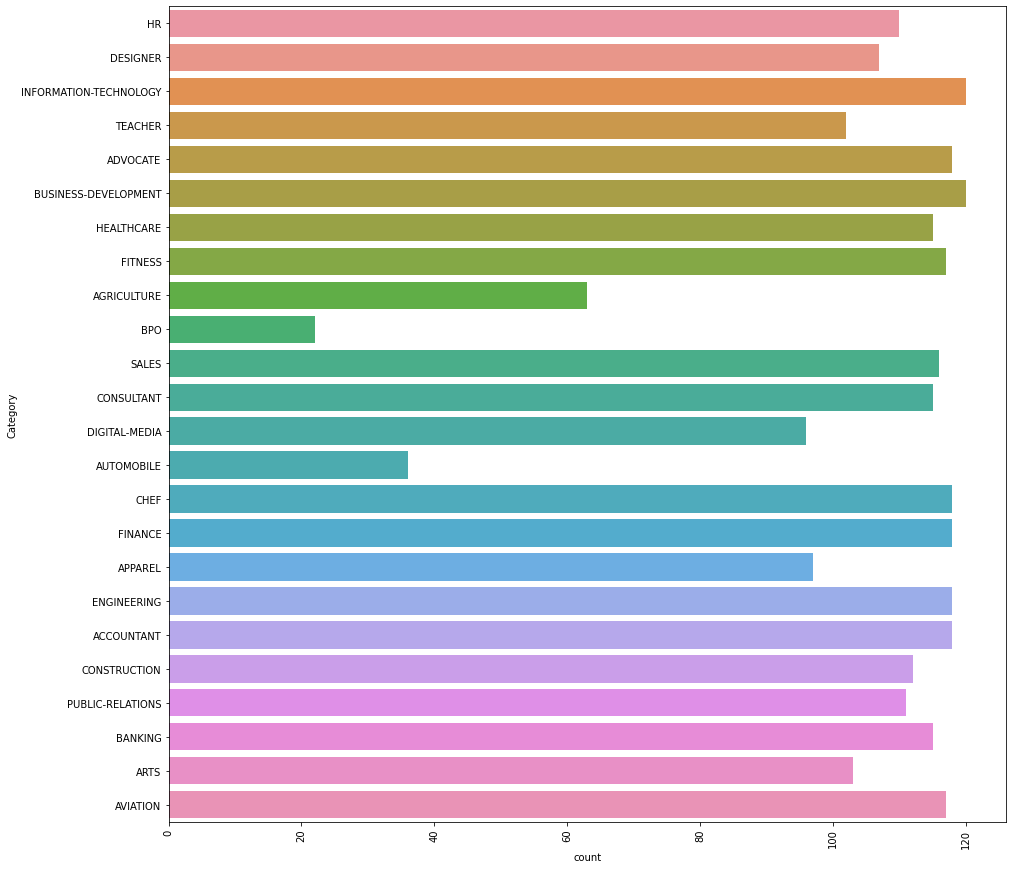

In [ ]:
import seaborn as sns
plt.figure(figsize=(15,15))
plt.xticks(rotation=90)
sns.countplot(y="Category", data=df)

In [ ]:
gender = df.Category.value_counts(normalize=True).mul(100).round(1).astype(str) + '%'
gender

INFORMATION-TECHNOLOGY    4.8%
BUSINESS-DEVELOPMENT      4.8%
FINANCE                   4.8%
ADVOCATE                  4.8%
ACCOUNTANT                4.8%
ENGINEERING               4.8%
CHEF                      4.8%
AVIATION                  4.7%
FITNESS                   4.7%
SALES                     4.7%
BANKING                   4.6%
HEALTHCARE                4.6%
CONSULTANT                4.6%
CONSTRUCTION              4.5%
PUBLIC-RELATIONS          4.5%
HR                        4.4%
DESIGNER                  4.3%
ARTS                      4.1%
TEACHER                   4.1%
APPAREL                   3.9%
DIGITAL-MEDIA             3.9%
AGRICULTURE               2.5%
AUTOMOBILE                1.4%
BPO                       0.9%
Name: Category, dtype: object

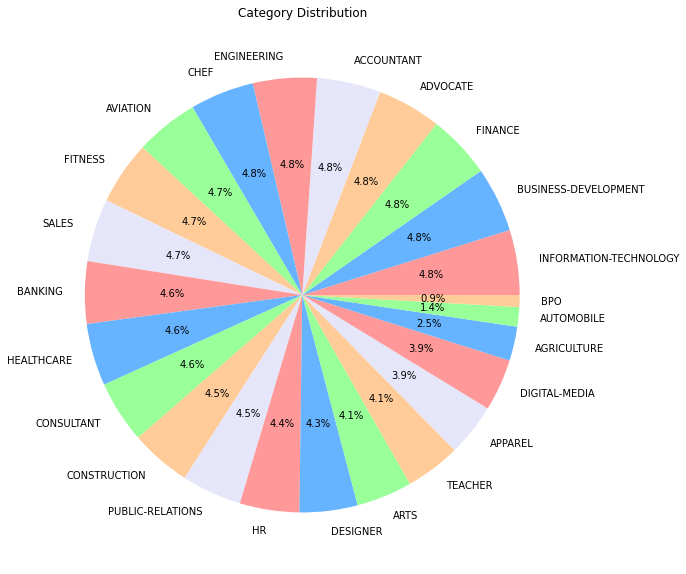

In [ ]:
from matplotlib.gridspec import GridSpec
import matplotlib.pyplot as plt

plt.figure(1, figsize=(22, 22))
grid = GridSpec(2,2)
data_label = ['INFORMATION-TECHNOLOGY',
'BUSINESS-DEVELOPMENT',
'FINANCE', 
'ADVOCATE',
'ACCOUNTANT',
'ENGINEERING' ,
'CHEF',
'AVIATION',
'FITNESS',
'SALES',
'BANKING',
'HEALTHCARE',
'CONSULTANT',
'CONSTRUCTION',
'PUBLIC-RELATIONS',
'HR',
'DESIGNER',
'ARTS',
'TEACHER',
'APPAREL',
'DIGITAL-MEDIA',
'AGRICULTURE',
'AUTOMOBILE',
'BPO']

colors = ['#ff9999','#66b3ff','#99ff99','#ffcc99','#E6E6FA']
plt.subplot(grid[0,1], aspect =1, title = 'Category Distribution')
source_pie = plt.pie(item_counts, labels= data_label, colors = colors, autopct = '%1.1f%%')
plt.show()


In [ ]:
df.head(20)


,ID,Resume_str,Resume_html,Category
0,16852973,HR ADMINISTRATOR/MARKETING ASSOCIATE\...,"<div class=""fontsize fontface vmargins hmargin...",HR
1,22323967,"HR SPECIALIST, US HR OPERATIONS ...","<div class=""fontsize fontface vmargins hmargin...",HR
2,33176873,HR DIRECTOR Summary Over 2...,"<div class=""fontsize fontface vmargins hmargin...",HR
3,27018550,HR SPECIALIST Summary Dedica...,"<div class=""fontsize fontface vmargins hmargin...",HR
4,17812897,HR MANAGER Skill Highlights ...,"<div class=""fontsize fontface vmargins hmargin...",HR
5,11592605,HR GENERALIST Summary Dedic...,"<div class=""fontsize fontface vmargins hmargin...",HR
6,25824789,HR MANAGER Summary HUMAN RES...,"<div class=""fontsize fontface vmargins hmargin...",HR
7,15375009,HR MANAGER Professional Summa...,"<div class=""fontsize fontface vmargins hmargin...",HR
8,11847784,HR SPECIALIST Summary Posses...,"<div class=""fontsize fontface vmargins hmargin...",HR
9,32896934,HR CLERK Summary Translates ...,"<div class=""fontsize fontface vmargins hmargin...",HR


#Data Cleaning 

In [ ]:
# drop some category that has less than 90 ish rows, we want to have enough rows for each category
cate_to_drop=['AGRICULTURE', 'AUTOMOBILE', 'BPO']
df_Clean = df[df.Category.isin(cate_to_drop)==False]

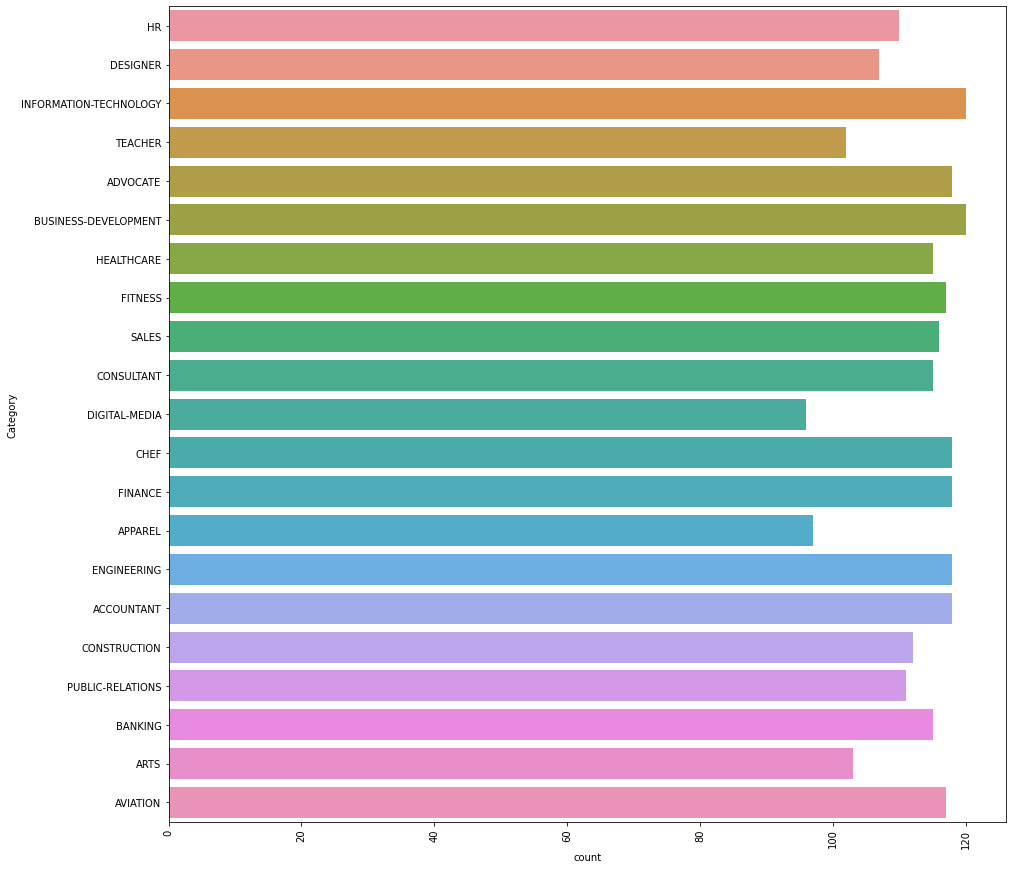

In [ ]:
import seaborn as sns
plt.figure(figsize=(15,15))
plt.xticks(rotation=90)
sns.countplot(y="Category", data=df_Clean)

##Get Key Text inside the data

In [ ]:
df["Resume_str"][0]

"         HR ADMINISTRATOR/MARKETING ASSOCIATE\n\nHR ADMINISTRATOR       Summary     Dedicated Customer Service Manager with 15+ years of experience in Hospitality and Customer Service Management.   Respected builder and leader of customer-focused teams; strives to instill a shared, enthusiastic commitment to customer service.         Highlights         Focused on customer satisfaction  Team management  Marketing savvy  Conflict resolution techniques     Training and development  Skilled multi-tasker  Client relations specialist           Accomplishments      Missouri DOT Supervisor Training Certification  Certified by IHG in Customer Loyalty and Marketing by Segment   Hilton Worldwide General Manager Training Certification  Accomplished Trainer for cross server hospitality systems such as    Hilton OnQ  ,   Micros    Opera PMS   , Fidelio    OPERA    Reservation System (ORS) ,   Holidex    Completed courses and seminars in customer service, sales strategies, inventory control, loss pr

In [ ]:
df["Resume_html"][0]

'<div class="fontsize fontface vmargins hmargins linespacing pagesize" id="document"> <div class="section firstsection" id="SECTION_NAME500375979" style="\n      padding-top:0px;\n    "> <div class="paragraph PARAGRAPH_NAME firstparagraph" id="PARAGRAPH_500375979_1_326506904" style="\n      padding-top:0px;\n    "> <div class="name" itemprop="name"> <span class="field fName" id="500375979FNAM1"> </span> <span> </span> <span class="field" id="500375979LNAM1"> HR ADMINISTRATOR/MARKETING ASSOCIATE\n\nHR ADMINISTRATOR</span> </div> </div> </div> <div class="section" id="SECTION_SUMM500375981" style="\n      padding-top:0px;\n    "> <div class="heading bottomborder"> <div class="sectiontitle" id="SECTNAME_SUMM500375981"> Summary</div> </div> <div class="paragraph firstparagraph" id="PARAGRAPH_500375981_1_326506917" style="\n      padding-top:0px;\n    "> <div class="field singlecolumn" id="500375981FRFM1"> <p align="LEFT"> Dedicated Customer Service Manager with 15+ years of experience in H

In here we see the df["Resume_str"] column has all the text of the resume but it is lots of data and mess up that it will be hard to clean but we found in the the df["Resume_html"] column has div parts that we can get some parts by using beatifulsoup and then clean those data

In [ ]:
# All the experience are listed as items in a <li> elements
# Skills are store in the key columns as class name = field singlecolumn
from bs4 import BeautifulSoup
def get_key_text(resumeHTML):
  output= []
  soup = BeautifulSoup(resumeHTML,'html.parser')
  try:
    experience_list = soup.find_all("li")
    for element in experience_list:
      output.append(element.text)
    skill_list = soup.find_all("div", class_= 'field singlecolumn')
    # for skill in skill_list:
    #   output.append(skill.text)
    output.append(skill_list[-1].text) # in the skill_list had multiple parts but we only need the last part
  except:
    print(resumeHTML, "doesn't have experience or skills find")

  return " " .join(map(str, output))


In [ ]:
test = get_key_text(df_Clean.Resume_html[230])
test

' Highly accomplished professional with over 10 years of experience in a variety of management areas.  Astute in identifying operational business needs, turning needs into requirements, and producing supporting business and reporting systems.  Skilled in all phases of project management, managing resources and personnel, and leadership.  Demonstrated ability to implement effective systems and manage high output work teams.  Key Proficiencies Personnel Management Leadership Management of on-shore/off-shore resources Financial budgets/planning Project Management Business Intelligence Communications Business Analysis Report Development/ Analysis User Relations/User Training Development Superior Microsoft Office Product Knowledge Redesign of entire BI Program including streamlining of platform, redesign of warehouse, and revamp of reporting tools, resulting in consistent data across entire organization, quality, trusted data for business decision making, and license cost savings of $30,000

In [ ]:
df_Clean['cleaned_resume'] = df_Clean.Resume_html.apply(lambda x : get_key_text(x))

<div class="fontsize fontface vmargins hmargins linespacing pagesize" id="document"> <div class="section firstsection" id="SECTION_NAME746852208" style="padding-top:0px;"> <div class="paragraph PARAGRAPH_NAME firstparagraph" id="PARAGRAPH_746852208_1_483865390" style="padding-top:0px;"> <div class="name thinbottomborder" itemprop="name"> <span class="field" id="746852208FNAM1"> </span> <span> </span> <span class="field" id="746852208LNAM1"> FREELANCE GRAPHIC DESIGNER</span> </div> <div class="botBorder"> </div> </div> </div> <div class="section" id="SECTION_SUMM746852210" style="padding-top:0px;"> </div> <div class="section" id="SECTION_HILT746852211" style="padding-top:0px;"> <div class="heading"> <div class="sectiontitle" id="SECTNAME_HILT746852211"> Highlights</div> </div> <div class="paragraph firstparagraph" id="PARAGRAPH_746852211_1_483865397" style="padding-top:0px;"> <div class="singlecolumn maincolumn"> <table class="twocol"> <tbody> <tr> <td class="field twocol_1" id="7468522

<ipython-input-19-263f1317b544>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_Clean['cleaned_resume'] = df_Clean.Resume_html.apply(lambda x : get_key_text(x))


In [ ]:
df_Clean['cleaned_resume'][570]

' Business systems analysis  Project management  Business process improvement  Forecasting and planning  Requirements gathering  Scope and project definition  Technology architecture analysis  Integrated Reporting Information System (IRIS)  Portfolio management  Budgeting  Cost-benefit analysis  Functional requirements  Requirement tracing  User acceptance testing  Fixed income modeling  Wealth management  Valuation specialist  SAP  Business requirements matrixes  Talented public speaker  Superb communication skills  Advanced problem solving abilities  Critical thinking  Project Management Training Certification.  Information System, Business Analyst, IT infrastructure, System Analysis and Development, Enterprise Model, Technology and Issues Training.  Implemented strategic change management concept, business intelligence, and the executed of Epic, Diebold, Oracle, Infor system projects for large organizations.  Demonstrated experience in system fault diagnosis, developing solutions an

In [ ]:
df_Clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2363 entries, 0 to 2483
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   ID              2363 non-null   int64 
 1   Resume_str      2363 non-null   object
 2   Resume_html     2363 non-null   object
 3   Category        2363 non-null   object
 4   cleaned_resume  2363 non-null   object
dtypes: int64(1), object(4)
memory usage: 175.3+ KB


In [ ]:
import re
def clean_function(resumeText):
    resumeText = re.sub('http\S+\s*', ' ', resumeText)  # remove URLs
    resumeText = re.sub('RT|cc', ' ', resumeText)  # remove RT and cc
    resumeText = re.sub('#\S+', '', resumeText)  # remove hashtags
    resumeText = re.sub('@\S+', '  ', resumeText)  # remove mentions
    resumeText = re.sub('[%s]' % re.escape("""!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~"""), ' ', resumeText)  # remove punctuations
    resumeText = re.sub(r'[^\x00-\x7f]',r' ', resumeText) 
    resumeText = re.sub('\s+', ' ', resumeText)  # remove extra whitespace
    resumeText = re.sub('\n', '', resumeText)  # remove new lines
    resumeText = re.sub('\t', '', resumeText)  # remove new tabs
    return resumeText

In [ ]:
df_Clean['cleaned_resume'][0]

" Missouri DOT Supervisor Training Certification  Certified by IHG in Customer Loyalty and Marketing by Segment   Hilton Worldwide General Manager Training Certification  Accomplished Trainer for cross server hospitality systems such as    Hilton OnQ  ,   Micros    Opera PMS   , Fidelio    OPERA    Reservation System (ORS) ,   Holidex    Completed courses and seminars in customer service, sales strategies, inventory control, loss prevention, safety, time management, leadership and performance assessment.  Helps to develop policies, directs and coordinates activities such as employment, compensation, labor relations, benefits, training, and employee services.  Prepares employee separation notices and related documentation  Keeps records of benefits plans participation such as insurance and pension plan, personnel transactions such as hires, promotions, transfers, performance reviews, and terminations, and employee statistics for government reporting.  Advises management in appropriate r

In [ ]:
df_Clean['cleaned_resume'].str.contains("\t")

0       False
1       False
2       False
3       False
4        True
        ...  
2479    False
2480    False
2481    False
2482    False
2483    False
Name: cleaned_resume, Length: 2363, dtype: bool

In [ ]:
df_Clean['cleaned_resume'] = df_Clean.cleaned_resume.apply(lambda x : clean_function(x))

<ipython-input-25-9241b38e179a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_Clean['cleaned_resume'] = df_Clean.cleaned_resume.apply(lambda x : clean_function(x))


##Text Insight

In [ ]:
!pip install nltk

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import nltk
from nltk.corpus import stopwords
import string
from wordcloud import WordCloud

In [ ]:
nltk.download("stopwords")
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [ ]:
#Stop words are generally the most common words in a language.
#English stop words from nltk:
SetOfStopWords= set(stopwords.words('english')+['``',"''"])

In [ ]:
totalWords= []

In [ ]:
Sentences= df_Clean['cleaned_resume'].values


In [ ]:
cleanedSentences= ""

In [ ]:
for records in Sentences:
    cleanedText= records
    cleanedSentences += cleanedText
    requiredWords = nltk.word_tokenize(cleanedText)
    for word in requiredWords:
        if word not in SetOfStopWords and word not in string.punctuation:
            totalWords.append(word)

In [ ]:
wordfreqdist = nltk.FreqDist(totalWords)

In [ ]:
wordfreqdist


FreqDist({'management': 5076, 'customer': 4593, 'new': 4505, 'sales': 4388, 'team': 3500, 'service': 3311, 'business': 3301, 'A': 3298, 'including': 3256, 'training': 2882, ...})

In [ ]:
mostcommon = wordfreqdist.most_common(30)
mostcommon

[('management', 5076),
 ('customer', 4593),
 ('new', 4505),
 ('sales', 4388),
 ('team', 3500),
 ('service', 3311),
 ('business', 3301),
 ('A', 3298),
 ('including', 3256),
 ('training', 2882),
 ('development', 2859),
 ('staff', 2754),
 ('customers', 2728),
 ('Management', 2717),
 ('skills', 2538),
 ('support', 2514),
 ('company', 2473),
 ('work', 2470),
 ('financial', 2455),
 ('clients', 2439),
 ('reports', 2435),
 ('project', 2341),
 ('ounts', 2235),
 ('data', 2233),
 ('process', 2194),
 ('system', 2183),
 ('marketing', 2173),
 ('I', 2157),
 ('information', 2141),
 ('client', 2129)]

###We can do more Natual Language Processing on the text linke remove stop words, stemming and lemmatization on adverbs and pronouns or may removing punctuations. We are not sure if those could affect the result, so we want to clean it later to compare if those affect the models.

In [ ]:
df_Clean.head()

,ID,Resume_str,Resume_html,Category,cleaned_resume
0,16852973,HR ADMINISTRATOR/MARKETING ASSOCIATE\...,"<div class=""fontsize fontface vmargins hmargin...",HR,Missouri DOT Supervisor Training Certificatio...
1,22323967,"HR SPECIALIST, US HR OPERATIONS ...","<div class=""fontsize fontface vmargins hmargin...",HR,Managed communication regarding launch of Ope...
2,33176873,HR DIRECTOR Summary Over 2...,"<div class=""fontsize fontface vmargins hmargin...",HR,Over 20 years experience in recruiting 15 plu...
3,27018550,HR SPECIALIST Summary Dedica...,"<div class=""fontsize fontface vmargins hmargin...",HR,Type 50 wpm and 10 Key by touch Microsoft pro...
4,17812897,HR MANAGER Skill Highlights ...,"<div class=""fontsize fontface vmargins hmargin...",HR,HR SKILLS HR Department Startup Three New Org...


In [ ]:
df_Clean['cleaned_resume'][0]

' Missouri DOT Supervisor Training Certification Certified by IHG in Customer Loyalty and Marketing by Segment Hilton Worldwide General Manager Training Certification A omplished Trainer for cross server hospitality systems such as Hilton OnQ Micros Opera PMS Fidelio OPERA Reservation System ORS Holidex Completed courses and seminars in customer service sales strategies inventory control loss prevention safety time management leadership and performance assessment Helps to develop policies directs and coordinates activities such as employment compensation labor relations benefits training and employee services Prepares employee separation notices and related documentation Keeps records of benefits plans participation such as insurance and pension plan personnel transactions such as hires promotions transfers performance reviews and terminations and employee statistics for government reporting Advises management in appropriate resolution of employee relations issues Administers benefits 

In [ ]:
new_df = df_Clean.copy(deep = True)
new_df.head() 

,ID,Resume_str,Resume_html,Category,cleaned_resume
0,16852973,HR ADMINISTRATOR/MARKETING ASSOCIATE\...,"<div class=""fontsize fontface vmargins hmargin...",HR,Missouri DOT Supervisor Training Certificatio...
1,22323967,"HR SPECIALIST, US HR OPERATIONS ...","<div class=""fontsize fontface vmargins hmargin...",HR,Managed communication regarding launch of Ope...
2,33176873,HR DIRECTOR Summary Over 2...,"<div class=""fontsize fontface vmargins hmargin...",HR,Over 20 years experience in recruiting 15 plu...
3,27018550,HR SPECIALIST Summary Dedica...,"<div class=""fontsize fontface vmargins hmargin...",HR,Type 50 wpm and 10 Key by touch Microsoft pro...
4,17812897,HR MANAGER Skill Highlights ...,"<div class=""fontsize fontface vmargins hmargin...",HR,HR SKILLS HR Department Startup Three New Org...


# CountVectorizer without Text Processing
Becasue Bag-Of-Words would encode some stopwords we do need, we think that may affect the model so we try the trial before doing any text processsing and another trail after using the text processing

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

targetText = new_df['cleaned_resume'].values
targetLabel = new_df['Category'].values
vectorizer = CountVectorizer(
    # sublinear_tf = True,
    stop_words='english',
    max_features=1500)
vectorizer.fit(targetText)
wordFeatures = vectorizer.transform(targetText)


In [ ]:
from sklearn.preprocessing import LabelEncoder

labels = ['Category']
le = LabelEncoder()
for i in labels:
  new_df[i] = le.fit_transform(new_df[i])

In [ ]:
new_df.head()

,ID,Resume_str,Resume_html,Category,cleaned_resume
0,16852973,HR ADMINISTRATOR/MARKETING ASSOCIATE\...,"<div class=""fontsize fontface vmargins hmargin...",16,Missouri DOT Supervisor Training Certificatio...
1,22323967,"HR SPECIALIST, US HR OPERATIONS ...","<div class=""fontsize fontface vmargins hmargin...",16,Managed communication regarding launch of Ope...
2,33176873,HR DIRECTOR Summary Over 2...,"<div class=""fontsize fontface vmargins hmargin...",16,Over 20 years experience in recruiting 15 plu...
3,27018550,HR SPECIALIST Summary Dedica...,"<div class=""fontsize fontface vmargins hmargin...",16,Type 50 wpm and 10 Key by touch Microsoft pro...
4,17812897,HR MANAGER Skill Highlights ...,"<div class=""fontsize fontface vmargins hmargin...",16,HR SKILLS HR Department Startup Three New Org...


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(wordFeatures,  targetLabel, random_state = 2, test_size= 0.2)
print(X_train.shape)
print(X_test.shape)

(1890, 1500)
(473, 1500)


In [ ]:
from sklearn.multiclass import OneVsRestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

In [ ]:
models = {
    'K-Nearest Neighbors' : KNeighborsClassifier(),
    'Logistic Regression' : LogisticRegression(),
    'Support Vector Machine' : SVC(),
    'Random Forest' : RandomForestClassifier()    
}

In [ ]:
model_list=[]
for model in models.values():
    model_list.append(OneVsRestClassifier(model))
model_list

[OneVsRestClassifier(estimator=KNeighborsClassifier()),
 OneVsRestClassifier(estimator=LogisticRegression()),
 OneVsRestClassifier(estimator=SVC()),
 OneVsRestClassifier(estimator=RandomForestClassifier())]

In [ ]:
for i in model_list:
    i.fit(X_train, y_train)
    print(f'{i} trained')

print("*"*60)
print("all models trained")

OneVsRestClassifier(estimator=KNeighborsClassifier()) trained


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _che

OneVsRestClassifier(estimator=LogisticRegression()) trained
OneVsRestClassifier(estimator=SVC()) trained
OneVsRestClassifier(estimator=RandomForestClassifier()) trained
************************************************************
all models trained


In [ ]:
for count, value in enumerate(model_list):
    print(f"Accuracy of {value} on training set :", model_list[count].score(X_train, y_train))
    print(f"Accuracy of {value} on test set :", model_list[count].score(X_test, y_test))
    print("*"*100)

print("all scores calculated for CountVectorizer before text progressing")

Accuracy of OneVsRestClassifier(estimator=KNeighborsClassifier()) on training set : 0.5216931216931217
Accuracy of OneVsRestClassifier(estimator=KNeighborsClassifier()) on test set : 0.37209302325581395
****************************************************************************************************
Accuracy of OneVsRestClassifier(estimator=LogisticRegression()) on training set : 0.9994708994708995
Accuracy of OneVsRestClassifier(estimator=LogisticRegression()) on test set : 0.5306553911205074
****************************************************************************************************
Accuracy of OneVsRestClassifier(estimator=SVC()) on training set : 0.9571428571428572
Accuracy of OneVsRestClassifier(estimator=SVC()) on test set : 0.6173361522198731
****************************************************************************************************
Accuracy of OneVsRestClassifier(estimator=RandomForestClassifier()) on training set : 1.0
Accuracy of OneVsRestClassifier(estima

#TfidfVectorizer without Text Processing

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

targetText = new_df['cleaned_resume'].values
targetLabel = new_df['Category'].values
vectorizer = TfidfVectorizer(
    sublinear_tf = True,
    stop_words='english',
    max_features=1500)
vectorizer.fit(targetText)
wordFeatures = vectorizer.transform(targetText)

In [ ]:
from sklearn.preprocessing import LabelEncoder

labels = ['Category']
le = LabelEncoder()
for i in labels:
  new_df[i] = le.fit_transform(new_df[i])

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(wordFeatures,  targetLabel, random_state = 2, test_size= 0.2)
print(X_train.shape)
print(X_test.shape)

(1890, 1500)
(473, 1500)


In [ ]:
models = {
    'K-Nearest Neighbors' : KNeighborsClassifier(),
    'Logistic Regression' : LogisticRegression(),
    'Support Vector Machine' : SVC(),
    'Random Forest' : RandomForestClassifier()    
}

In [ ]:
model_list=[]
for model in models.values():
    model_list.append(OneVsRestClassifier(model))
model_list

[OneVsRestClassifier(estimator=KNeighborsClassifier()),
 OneVsRestClassifier(estimator=LogisticRegression()),
 OneVsRestClassifier(estimator=SVC()),
 OneVsRestClassifier(estimator=RandomForestClassifier())]

In [ ]:
for i in model_list:
    i.fit(X_train, y_train)
    print(f'{i} trained')

print("*"*60)
print("all models trained")

OneVsRestClassifier(estimator=KNeighborsClassifier()) trained
OneVsRestClassifier(estimator=LogisticRegression()) trained
OneVsRestClassifier(estimator=SVC()) trained
OneVsRestClassifier(estimator=RandomForestClassifier()) trained
************************************************************
all models trained


In [ ]:
for count, value in enumerate(model_list):
    print(f"Accuracy of {value} on training set :", model_list[count].score(X_train, y_train))
    print(f"Accuracy of {value} on test set :", model_list[count].score(X_test, y_test))
    print("*"*100)

print("all scores calculated for TfidfVectorizer before text progressing")

Accuracy of OneVsRestClassifier(estimator=KNeighborsClassifier()) on training set : 0.6417989417989418
Accuracy of OneVsRestClassifier(estimator=KNeighborsClassifier()) on test set : 0.5243128964059197
****************************************************************************************************
Accuracy of OneVsRestClassifier(estimator=LogisticRegression()) on training set : 0.7724867724867724
Accuracy of OneVsRestClassifier(estimator=LogisticRegression()) on test set : 0.6025369978858351
****************************************************************************************************
Accuracy of OneVsRestClassifier(estimator=SVC()) on training set : 0.9968253968253968
Accuracy of OneVsRestClassifier(estimator=SVC()) on test set : 0.6152219873150105
****************************************************************************************************
Accuracy of OneVsRestClassifier(estimator=RandomForestClassifier()) on training set : 1.0
Accuracy of OneVsRestClassifier(estimat

#Text Processing

In [ ]:
import spacy
#loading the english language small model of spacy
en = spacy.load('en_core_web_sm')
stopwords = en.Defaults.stop_words

print(len(stopwords))
print(stopwords)

/usr/local/lib/python3.8/dist-packages/torch/cuda/__init__.py:497: UserWarning: Can't initialize NVML
  warnings.warn("Can't initialize NVML")


326
{'no', 'move', 'show', 'seems', 'towards', 'eight', 'since', 'whence', 'nothing', 'up', 'himself', 'anyone', 'three', 'whom', 'to', 'above', 'ourselves', 'has', 'onto', 'except', 'whatever', 'ca', 'now', 'whose', 'here', 'various', 'eleven', 'of', 'besides', 'him', 'which', 'that', 'whether', 'might', 'though', 'thus', 'empty', 'beside', 'very', "'re", 'too', 'our', '‘d', 'anywhere', 'herein', 'there', 'itself', 'off', 'nowhere', "'ll", 'whereupon', 'yourselves', 'because', 'wherein', 'became', 'these', 'across', 'toward', 'your', 'cannot', '’d', 'afterwards', 'wherever', 'beyond', 'becoming', 'how', 'you', 'me', 'whither', "n't", 'nevertheless', "'m", 'none', 'did', '‘s', 'the', 'top', 'by', 'some', 'nobody', 'not', 'perhaps', 'also', 'four', 'regarding', 'somewhere', '‘re', 'then', 'via', 're', 'latter', 'formerly', '‘m', 'he', 'whole', 'this', 'see', 'one', 'all', 'and', 'further', 'if', 'nor', 'they', 'thereupon', 'side', 'indeed', 'rather', 'whoever', 'somehow', 'back', 'betwe

In [ ]:
# from spacy.lang.en import English

In [ ]:
nltk.download('omw-1.4')

[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [ ]:
!python -m textblob.download_corpora

[nltk_data] Downloading package brown to /root/nltk_data...
[nltk_data]   Package brown is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package conll2000 to /root/nltk_data...
[nltk_data]   Package conll2000 is already up-to-date!
[nltk_data] Downloading package movie_reviews to /root/nltk_data...
[nltk_data]   Package movie_reviews is already up-to-date!
Finished.


In [ ]:
import nltk
import spacy
 
# essential entity models downloads
nltk.downloader.download('maxent_ne_chunker')
nltk.downloader.download('words')
nltk.downloader.download('treebank')
nltk.downloader.download('maxent_treebank_pos_tagger')
nltk.downloader.download('punkt')
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package maxent_ne_chunker is already up-to-date!
[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Package words is already up-to-date!
[nltk_data] Downloading package treebank to /root/nltk_data...
[nltk_data]   Package treebank is already up-to-date!
[nltk_data] Downloading package maxent_treebank_pos_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package maxent_treebank_pos_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [ ]:
# !pip install spacy download en_core_web_sm

In [ ]:
# !pip install locationtagger

In [ ]:
# conten = df_Clean[df_Clean["cleaned_resume"].str.contains('Missouri')]
# print(conten)

In [ ]:
import pandas as pd
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [ ]:
import spacy
#loading the english language small model of spacy
en = spacy.load('en_core_web_sm')
stopwords = en.Defaults.stop_words
import nltk
nltk.download('stopwords')
nltk.download('punkt')
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import WordPunctTokenizer

def text_processing(data):
  # convert to lower case
  lower_string = data.lower()
  
  # remove all punctuation except words and space
  no_punc_string = re.sub(r'[^\w\s]','', lower_string)
  
  # remove white spaces
  no_wspace_string = no_punc_string.strip()

  # convert string to list of words
  lst_string = [no_wspace_string][0].split()

  # remove stopwords
  no_stpwords_string=""
  for i in lst_string:
      if not i in stopwords:
          no_stpwords_string += i+' '
          
  # removing last space
  no_stpwords_string = no_stpwords_string[:-1]

 
  stemming = []
  stemmer = nltk.PorterStemmer()
  # Stemming
  for word in no_stpwords_string:

      words = stemmer.stem(word)
      # sentences[i] = ' '.join(words)
      stemming.append(words)
  
  wordnet_lemmatizer = WordNetLemmatizer()
  # Lemmatization
  # for i in range(len(sentences)):
  #     words = nltk.word_tokenize(sentences[i])
  #     words = [lemmatizer.lemmatize(word) for word in words]
  #     sentences[i] = ' '.join(words)
  lemma_word = ""
  # sentences = nltk.word_tokenize(sentences)
  for w in stemming:
    word1 = wordnet_lemmatizer.lemmatize(w, pos = "n")
    word2 = wordnet_lemmatizer.lemmatize(word1, pos = "v")
    word3 = wordnet_lemmatizer.lemmatize(word2, pos = ("a"))
    lemma_word += word3
  lemma_word = lemma_word[:-1]
  # return sentences
  return lemma_word





[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [ ]:
text_processing(new_df['cleaned_resume'][0])

'missouri dot supervisor training certification certified ihg customer loyalty marketing segment hilton worldwide general manager training certification omplished trainer cross server hospitality systems hilton onq micros opera pms fidelio opera reservation system ors holidex completed courses seminars customer service sales strategies inventory control loss prevention safety time management leadership performance assessment helps develop policies directs coordinates activities employment compensation labor relations benefits training employee services prepares employee separation notices related documentation keeps records benefits plans participation insurance pension plan personnel transactions hires promotions transfers performance reviews terminations employee statistics government reporting advises management appropriate resolution employee relations issues administers benefits programs life health dental insurance pension plans vacation sick leave leave absence employee assistan

In [ ]:
df_Clean

,ID,Resume_str,Resume_html,Category,cleaned_resume
0,16852973,HR ADMINISTRATOR/MARKETING ASSOCIATE\...,"<div class=""fontsize fontface vmargins hmargin...",HR,Missouri DOT Supervisor Training Certificatio...
1,22323967,"HR SPECIALIST, US HR OPERATIONS ...","<div class=""fontsize fontface vmargins hmargin...",HR,Managed communication regarding launch of Ope...
2,33176873,HR DIRECTOR Summary Over 2...,"<div class=""fontsize fontface vmargins hmargin...",HR,Over 20 years experience in recruiting 15 plu...
3,27018550,HR SPECIALIST Summary Dedica...,"<div class=""fontsize fontface vmargins hmargin...",HR,Type 50 wpm and 10 Key by touch Microsoft pro...
4,17812897,HR MANAGER Skill Highlights ...,"<div class=""fontsize fontface vmargins hmargin...",HR,HR SKILLS HR Department Startup Three New Org...
...,...,...,...,...,...
2479,99416532,RANK: SGT/E-5 NON- COMMISSIONED OFFIC...,"<div class=""fontsize fontface vmargins hmargin...",AVIATION,Motivated logistics specialist su essful at m...
2480,24589765,"GOVERNMENT RELATIONS, COMMUNICATIONS ...","<div class=""fontsize fontface vmargins hmargin...",AVIATION,Government Relations and Communications WSDOT...
2481,31605080,GEEK SQUAD AGENT Professional...,"<div class=""fontsize fontface vmargins hmargin...",AVIATION,Provided technical support in person and over...
2482,21190805,PROGRAM DIRECTOR / OFFICE MANAGER ...,"<div class=""fontsize fontface vmargins hmargin...",AVIATION,Serve as director for a not for profit corpor...


In [ ]:
new_df

,ID,Resume_str,Resume_html,Category,cleaned_resume
0,16852973,HR ADMINISTRATOR/MARKETING ASSOCIATE\...,"<div class=""fontsize fontface vmargins hmargin...",16,Missouri DOT Supervisor Training Certificatio...
1,22323967,"HR SPECIALIST, US HR OPERATIONS ...","<div class=""fontsize fontface vmargins hmargin...",16,Managed communication regarding launch of Ope...
2,33176873,HR DIRECTOR Summary Over 2...,"<div class=""fontsize fontface vmargins hmargin...",16,Over 20 years experience in recruiting 15 plu...
3,27018550,HR SPECIALIST Summary Dedica...,"<div class=""fontsize fontface vmargins hmargin...",16,Type 50 wpm and 10 Key by touch Microsoft pro...
4,17812897,HR MANAGER Skill Highlights ...,"<div class=""fontsize fontface vmargins hmargin...",16,HR SKILLS HR Department Startup Three New Org...
...,...,...,...,...,...
2479,99416532,RANK: SGT/E-5 NON- COMMISSIONED OFFIC...,"<div class=""fontsize fontface vmargins hmargin...",4,Motivated logistics specialist su essful at m...
2480,24589765,"GOVERNMENT RELATIONS, COMMUNICATIONS ...","<div class=""fontsize fontface vmargins hmargin...",4,Government Relations and Communications WSDOT...
2481,31605080,GEEK SQUAD AGENT Professional...,"<div class=""fontsize fontface vmargins hmargin...",4,Provided technical support in person and over...
2482,21190805,PROGRAM DIRECTOR / OFFICE MANAGER ...,"<div class=""fontsize fontface vmargins hmargin...",4,Serve as director for a not for profit corpor...


In [ ]:
new_df['cleaned_resume2'] = new_df.cleaned_resume.apply(lambda x : text_processing(x))

In [ ]:
conten = new_df[new_df["cleaned_resume2"].str.contains('Missouri')]
print(conten)

Empty DataFrame
Columns: [ID, Resume_str, Resume_html, Category, cleaned_resume, cleaned_resume2]
Index: []


City, Name, Location may affect the test result, but hard to remove so far

#CountVectorizer with Text Processing

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

targetText = new_df['cleaned_resume2'].values
targetLabel = new_df['Category'].values
vectorizer = CountVectorizer(
    # sublinear_tf = True,
    stop_words='english',
    max_features=1500)
vectorizer.fit(targetText)
wordFeatures2 = vectorizer.transform(targetText)

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(wordFeatures2,  targetLabel, random_state = 2, test_size= 0.2)
print(X_train.shape)
print(X_test.shape)

(1890, 1500)
(473, 1500)


In [ ]:
models = {
    'K-Nearest Neighbors' : KNeighborsClassifier(),
    'Logistic Regression' : LogisticRegression(),
    'Support Vector Machine' : SVC(),
    'Random Forest' : RandomForestClassifier()    
}

In [ ]:
model_list=[]
for model in models.values():
    model_list.append(OneVsRestClassifier(model))
model_list

[OneVsRestClassifier(estimator=KNeighborsClassifier()),
 OneVsRestClassifier(estimator=LogisticRegression()),
 OneVsRestClassifier(estimator=SVC()),
 OneVsRestClassifier(estimator=RandomForestClassifier())]

In [ ]:
for i in model_list:
    i.fit(X_train, y_train)
    print(f'{i} trained')

print("*"*60)
print("all models trained")

OneVsRestClassifier(estimator=KNeighborsClassifier()) trained


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _che

OneVsRestClassifier(estimator=LogisticRegression()) trained
OneVsRestClassifier(estimator=SVC()) trained
OneVsRestClassifier(estimator=RandomForestClassifier()) trained
************************************************************
all models trained


In [ ]:
for count, value in enumerate(model_list):
    print(f"Accuracy of {value} on training set :", model_list[count].score(X_train, y_train))
    print(f"Accuracy of {value} on test set :", model_list[count].score(X_test, y_test))
    print("*"*100)

print("all scores calculated for CountVectorizer after text processing")

Accuracy of OneVsRestClassifier(estimator=KNeighborsClassifier()) on training set : 0.5190476190476191
Accuracy of OneVsRestClassifier(estimator=KNeighborsClassifier()) on test set : 0.3763213530655391
****************************************************************************************************
Accuracy of OneVsRestClassifier(estimator=LogisticRegression()) on training set : 0.9989417989417989
Accuracy of OneVsRestClassifier(estimator=LogisticRegression()) on test set : 0.5243128964059197
****************************************************************************************************
Accuracy of OneVsRestClassifier(estimator=SVC()) on training set : 0.9566137566137566
Accuracy of OneVsRestClassifier(estimator=SVC()) on test set : 0.6257928118393234
****************************************************************************************************
Accuracy of OneVsRestClassifier(estimator=RandomForestClassifier()) on training set : 1.0
Accuracy of OneVsRestClassifier(estimat

#TfidfVectorizer with Text Processing

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

targetText = new_df['cleaned_resume2'].values
targetLabel = new_df['Category'].values
vectorizer = TfidfVectorizer(
    sublinear_tf = True,
    stop_words='english',
    max_features=1500)
vectorizer.fit(targetText)
wordFeatures = vectorizer.transform(targetText)

In [ ]:
new_df.head()

,ID,Resume_str,Resume_html,Category,cleaned_resume,cleaned_resume2
0,16852973,HR ADMINISTRATOR/MARKETING ASSOCIATE\...,"<div class=""fontsize fontface vmargins hmargin...",16,Missouri DOT Supervisor Training Certificatio...,missouri dot supervisor training certification...
1,22323967,"HR SPECIALIST, US HR OPERATIONS ...","<div class=""fontsize fontface vmargins hmargin...",16,Managed communication regarding launch of Ope...,managed communication launch operations group ...
2,33176873,HR DIRECTOR Summary Over 2...,"<div class=""fontsize fontface vmargins hmargin...",16,Over 20 years experience in recruiting 15 plu...,20 years experience recruiting 15 plus years h...
3,27018550,HR SPECIALIST Summary Dedica...,"<div class=""fontsize fontface vmargins hmargin...",16,Type 50 wpm and 10 Key by touch Microsoft pro...,type 50 wpm 10 key touch microsoft programs wo...
4,17812897,HR MANAGER Skill Highlights ...,"<div class=""fontsize fontface vmargins hmargin...",16,HR SKILLS HR Department Startup Three New Org...,hr skills hr department startup new organizati...


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(wordFeatures,  targetLabel, random_state = 2, test_size= 0.2)
print(X_train.shape)
print(X_test.shape)

(1890, 1500)
(473, 1500)


In [ ]:
models = {
    'K-Nearest Neighbors' : KNeighborsClassifier(),
    'Logistic Regression' : LogisticRegression(),
    'Support Vector Machine' : SVC(),
    'Random Forest' : RandomForestClassifier()    
}

In [ ]:
model_list=[]
for model in models.values():
    model_list.append(OneVsRestClassifier(model))
model_list

[OneVsRestClassifier(estimator=KNeighborsClassifier()),
 OneVsRestClassifier(estimator=LogisticRegression()),
 OneVsRestClassifier(estimator=SVC()),
 OneVsRestClassifier(estimator=RandomForestClassifier())]

In [ ]:
for i in model_list:
    i.fit(X_train, y_train)
    print(f'{i} trained')

print("*"*60)
print("all models trained")

OneVsRestClassifier(estimator=KNeighborsClassifier()) trained
OneVsRestClassifier(estimator=LogisticRegression()) trained
OneVsRestClassifier(estimator=SVC()) trained
OneVsRestClassifier(estimator=RandomForestClassifier()) trained
************************************************************
all models trained


In [ ]:
for count, value in enumerate(model_list):
    print(f"Accuracy of {value} on training set :", model_list[count].score(X_train, y_train))
    print(f"Accuracy of {value} on test set :", model_list[count].score(X_test, y_test))
    print("*"*100)

print("all scores calculated for TfidfVectorizer after text processing")

Accuracy of OneVsRestClassifier(estimator=KNeighborsClassifier()) on training set : 0.6439153439153439
Accuracy of OneVsRestClassifier(estimator=KNeighborsClassifier()) on test set : 0.5243128964059197
****************************************************************************************************
Accuracy of OneVsRestClassifier(estimator=LogisticRegression()) on training set : 0.773015873015873
Accuracy of OneVsRestClassifier(estimator=LogisticRegression()) on test set : 0.6109936575052854
****************************************************************************************************
Accuracy of OneVsRestClassifier(estimator=SVC()) on training set : 0.9968253968253968
Accuracy of OneVsRestClassifier(estimator=SVC()) on test set : 0.6131078224101479
****************************************************************************************************
Accuracy of OneVsRestClassifier(estimator=RandomForestClassifier()) on training set : 1.0
Accuracy of OneVsRestClassifier(estimato